## Generate training and testing data for rot / trans eqiuv learning

In [1]:
import math

import numpy as np

### Start by generating samples on a plane where z = 0

In [2]:
RAND_SEED = 42
np.random.seed(RAND_SEED)

In [3]:
# minimum and maxomum vector length _ANGLE_
MIN_VEC_LEN_ANG = 1
MAX_VEC_LEN_ANG = 3.5

In [4]:
def shirley():
#     uv= unit_vector(vector)
#     u = uv[0]
#     v = uv[1]
    u = random_in_range(0,0.99)
    v = random_in_range(0,0.99)
    if u==0 and v==0: 
        return (0,0,0)
    theta=0
    r = 1
    a=2*u-1
    b=2*v-1
    if(a*a>b*b):
        r = a
        phi = math.pi/4*b/a
    else:
        r = b
        phi = math.pi/2- math.pi/4*a/b
    x= r*math.cos(phi)
    y= r*math.sin(phi)
    
    return u, v, x,y

In [5]:
def random_in_range(min_len, max_len):
    l = np.random.random_sample()
    v = (max_len - min_len) * l + min_len
    return v

In [6]:
def generate_random_2d_sample():
    z0 = 0
    z1 = random_in_range(0, 0)
    z2 = random_in_range(0, 0)
    alpha = random_in_range(0, 179.999)
    x0 = 0
    x1 = random_in_range(MIN_VEC_LEN_ANG, MAX_VEC_LEN_ANG)
    new_vec = random_in_range(MIN_VEC_LEN_ANG, MAX_VEC_LEN_ANG)
    x2 = new_vec * math.cos(math.radians(alpha))
    y0 = 0
    y1 = 0
    y2 = new_vec * math.sin(math.radians(alpha))
    return (alpha, ([x0, y0, z0], [x1, 0, z1]), ([x0, y0, z0], [x2, y2, z2]))

In [7]:
generate_random_2d_sample()

(131.7581775321111,
 ([0, 0, 0], [2.4966462104925915, 0, 0.0]),
 ([0, 0, 0], [-0.9257545505963204, 1.0369224008076985, 0.0]))

In [8]:
# poached from https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python/13849249#13849249
import operator

def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2' """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def generate_random_nd_sample_test(test_input):

    vec1 = [m - n for m,n in zip(test_input[1][1],test_input[1][0])]
    vec2 = [m - n for m,n in zip(test_input[2][1],test_input[2][0])]
    rad_alpha = angle_between(vec1, vec2)
    print(math.degrees(rad_alpha), test_input[0])
    


In [9]:
generate_random_nd_sample_test(generate_random_2d_sample())

155.91084006334253 155.91084006334256


In [10]:
MAX_SAMPLES = 1000
samples = []
for sample in range(MAX_SAMPLES):
    samples.append(generate_random_2d_sample())

## Rotate and then translate

In [11]:
# def generate_random_rotation(sample):
#     # look at shirley 1997 iirc
#     accesion_angle
#     declination_angle
#     # apply rotation matrix
#     return result
max_theta_rot = 179.99
max_phi_rot = 359.99

def generate_random_rotation(sample_input, max_theta_rot, max_phi_rot):
    # look at shirley 1997 iirc
    theta = math.radians(random_in_range(0, max_theta_rot))
    phi = math.radians(random_in_range(0, max_phi_rot))
    
    
#     rot_matrix = np.array([[math.cos(theta) * math.cos(phi), math.sin(phi), math.sin(theta) * math.cos(phi)],
#                           [-math.sin(phi) * math.cos(theta), math.sin(phi) * math.cos(theta), -math.sin(phi) * math.sin(theta)],
#                           [-math.sin(theta), 0, math.cos(theta)]])
    
    
    # apply rotation matrix
    
    x1_new, y1_new, z1_new = rotate_multiply(sample_input[1][1], theta, phi)
    x2_new, y2_new, z2_new = rotate_multiply(sample_input[2][1], theta, phi)
    return (sample_input[0], (sample_input[1][0], [x1_new, y1_new, z1_new]), (sample_input[2][0], [x2_new, y2_new, z2_new]))
    
def rotate_multiply(vector, theta, phi):
    
    x_new = vector[0] * math.cos(theta) * math.cos(phi) + vector[1] * math.sin(phi) + vector[2] * math.sin(theta) * math.cos(phi)
    y_new = - vector[0] * math.sin(phi) * math.cos(theta) + vector[1] * math.cos(phi) - vector[2] * math.sin(phi) * math.sin(theta)
    z_new = - vector[0] * math.sin(theta) + vector[2] * math.cos(theta)
    
    return x_new, y_new, z_new

In [12]:
max_x_trans = 2
max_y_trans = 2
max_z_trans = 2

def generate_random_translation(sample_input, x, y, z):
    x_trans = random_in_range(0, x)
    y_trans = random_in_range(0, y)
    z_trans = random_in_range(0, z)
    x0, y0, z0 = [m + n for m,n in zip(sample_input[1][0], [x_trans, y_trans, z_trans])]
    x1, y1, z1 = [m + n for m,n in zip(sample_input[1][1], [x_trans, y_trans, z_trans])]
    x2, y2, z2 = [m + n for m,n in zip(sample_input[2][1], [x_trans, y_trans, z_trans])]
    vec1 = [m - n for m,n in zip([x0, y0, z0], [x1, y1, z1])]
    vec2 = [m - n for m,n in zip([x0, y0, z0], [x2, y2, z2])]
    rad_deg = math.degrees(angle_between(vec1, vec2))
    
    return (rad_deg, ([x0, y0, z0], [x1, y1, z1]), ([x0, y0, z0], [x2, y2, z2]))

    

In [13]:
sample_2d = generate_random_2d_sample()
sample_3d = generate_random_rotation(sample_2d, max_theta_rot, max_phi_rot)
sample_3d = generate_random_translation(sample_3d, max_x_trans, max_y_trans, max_z_trans)
generate_random_nd_sample_test(sample_3d)


96.36206290333016 96.36206290333016


<IPython.core.display.Javascript object>


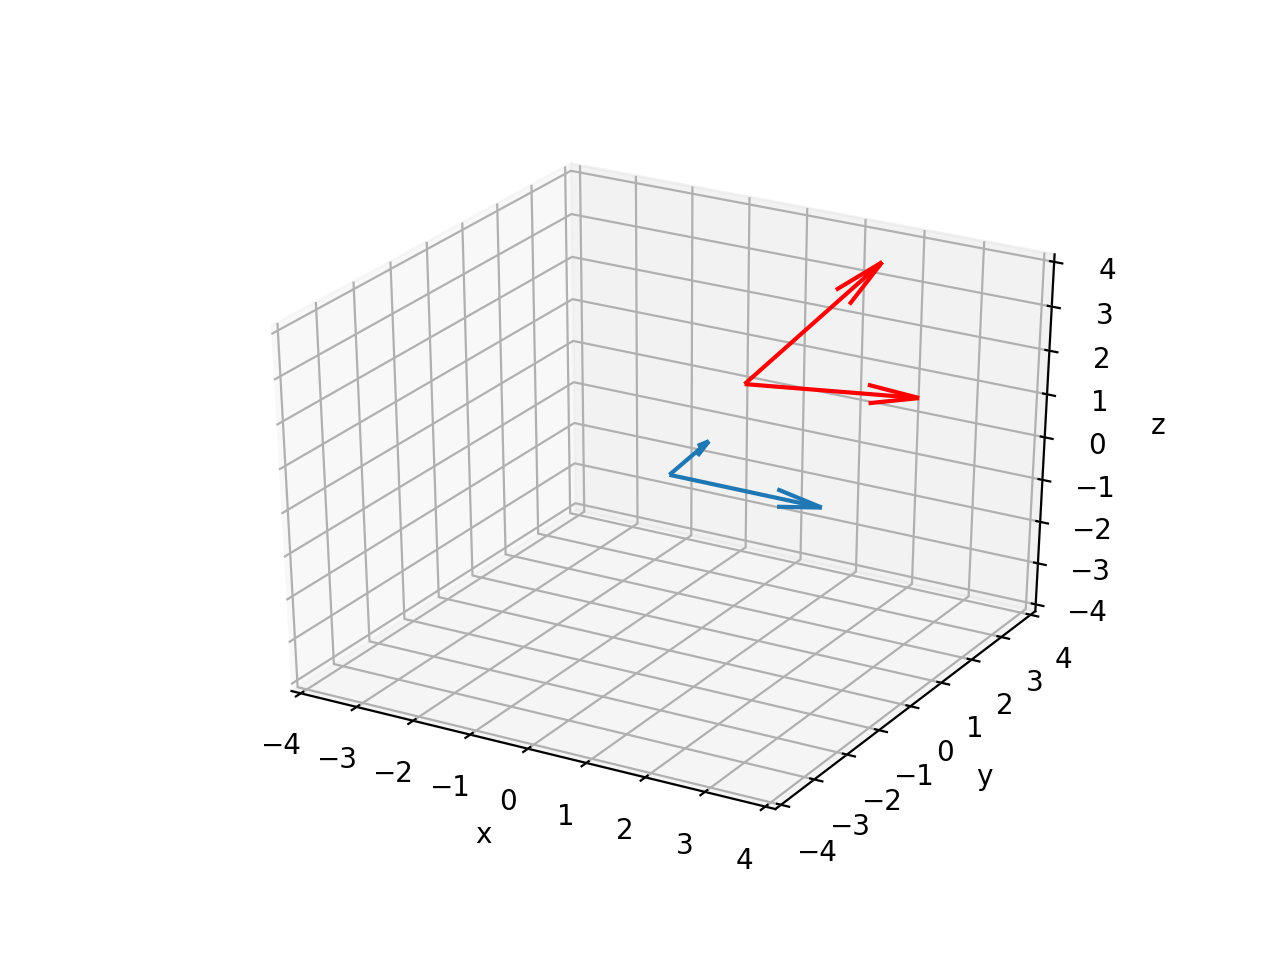

In [14]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def plot_vec(initial_sample, rotated_sample):
    initial_vec = np.array([initial_sample[1][0] + initial_sample[1][1], initial_sample[2][0] + initial_sample[2][1]])
    rotated_vec = np.array([rotated_sample[1][0] + rotated_sample[1][1], rotated_sample[2][0] + rotated_sample[2][1]]) 

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for vector in initial_vec:
        v = np.array([vector[3],vector[4],vector[5]])
        vlength=np.linalg.norm(v)
        ax.quiver(vector[0],vector[1],vector[2],vector[3],vector[4],vector[5],
               pivot='tail',arrow_length_ratio=0.3)
    for vector in rotated_vec:

        v = np.array([vector[3],vector[4],vector[5]])
        vlength=np.linalg.norm(v)
        ax.quiver(vector[0],vector[1],vector[2],vector[3],vector[4],vector[5],
                pivot='tail', arrow_length_ratio=0.3, color='red')
    ax.set_xlim([-4,4])
    ax.set_ylim([-4,4])
    ax.set_zlim([-4,4])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

plot_vec(sample_2d, sample_3d)


In [61]:
MAX_SAMPLES = 1000
samples_or = []
samples_rot = []

for sample in range(MAX_SAMPLES):
    sample_2d = generate_random_2d_sample()
    sample_3d = generate_random_rotation(sample_2d, max_theta_rot, max_phi_rot)
    sample_3d = generate_random_translation(sample_3d, max_x_trans, max_y_trans, max_z_trans)
    samples_or.append(sample_2d)
    samples_rot.append(sample_3d)
    


In [63]:
#print(samples_or)

In [67]:
def make_voxel_grids(coords, feature, bin_size=1.0, num_bins=30.0):
    """Convert atom coordinates and features represented as 2D arrays into a
    fixed-sized 3D box.

    Parameters
    ----------
    coords, features: array-likes, shape (N, 3) and (N, )
        Arrays with coordinates and features for each atoms.
    grid_resolution: float, optional
        Resolution of a grid (in Angstroms).
    max_dist: float, optional
        Maximum distance between atom and box center. Resulting box has size of
        bin_size * num_bins +1 Angstroms and atoms that are too far away are not
        included.

    Returns
    -------
    coords: np.ndarray, shape = (M, M, M, F)
        4D array with atom properties distributed in 3D space. M is equal to
        2 * `max_dist` / `grid_resolution` + 1
    """

    try:
        coords = np.asarray(coords, dtype=np.float)
    except ValueError:
        raise ValueError('coords must be an array of floats of shape (N, 3)')
    c_shape = coords.shape
    if len(c_shape) != 2 or c_shape[1] != 3:
        raise ValueError('coords must be an array of floats of shape (N, 3)')

    N = len(coords)
#     try:
#         features = np.asarray(features, dtype=np.float)
#     except ValueError:
#         raise ValueError('features must be an array of floats of shape (N, F)')
#     f_shape = features.shape
#     if len(f_shape) != 2 or f_shape[0] != N:
#         raise ValueError('features must be an array of floats of shape (N, F)')

    if not isinstance(bin_size, (float, int)):
        raise TypeError('bin_size must be float')
    if bin_size <= 0:
        raise ValueError('bin_size must be positive')

    if not isinstance(num_bins, int):
        raise TypeError('num_bins must be integer')
    if num_bins <= 0:
        raise ValueError('num_bins must be positive')

    # num_features = f_shape[1]
    num_bins = float(num_bins)
    bin_size = float(bin_size)

    box_size = math.ceil(num_bins * bin_size)
#     print(box_size)

    # move all atoms to the neares grid point
    grid_coords = (coords + bin_size * num_bins / 2.0) * 3.0
    #grid_coords = grid_coords.round().astype(int)
    grid_coords = grid_coords.round().astype(int)
    # remove atoms outside the box
    in_box = ((grid_coords > 0) & (grid_coords < box_size / bin_size)).all(axis=1)
    grid_box = np.int(box_size / bin_size)
    voxel_grid = np.zeros((1, grid_box, grid_box, grid_box),
                    dtype=np.float32)
    for (x, y, z), f in zip(grid_coords[in_box], feature[in_box]):

         voxel_grid[0, x, y, z] = f
    #print(np.count_nonzero(voxel_grid))

    return voxel_grid



In [72]:
def generate_atom_positions(samples):
    atom_positions = []
    voxel = []
    target = []
    prop = [1.0, 1.0, 1.0]
    for sample in samples:
        atom_position = [sample[1][0], sample[1][1], sample[2][1]]
        atom_positions.append(atom_position)
        prop = np.array(prop).reshape(len(atom_position))
        vox = make_voxel_grids(atom_position, prop, bin_size=0.33, num_bins=60)
        voxel.append(vox)
        target.append(sample[0])
    # apply translation matrix
    return voxel, target
vox, tar = generate_atom_positions(samples_rot)
print(np.shape(vox))
print(np.shape(tar))

(1000, 1, 60, 60, 60)
(1000,)


In [73]:
np.save('sample.npy', vox)
np.save('target.npy', tar)
data_load = np.load('sample.npy')

np.shape(data_load)

(1000, 1, 60, 60, 60)

In [1]:
1000 / 500

2.0

In [38]:
vec1 = [m - n for m,n in zip([30, 35, 22], [30, 34, 30])]
vec2 = [m - n for m,n in zip([31, 33, 40], [30, 34, 30])]

rad_deg = math.degrees(angle_between(vec1, vec2))
print(rad_deg, samples_rot[0][0])

174.14473431816612 171.56066747083034


In [ ]:
def generate_random_3d_sample():
    sample = generate_random_2d_sample()
    sample = generate_random_rotation(sample)
    sample = generate_random_translation(sample)
    return sample

In [ ]:
generate_random_nd_sample_test(generate_random_3d_sample())

In [ ]:
def plot_sample_in_3d():
    return

In [ ]:
def shirley():
    u= random_in_range(0.01, 0.99)
    v = random_in_range(0.01, 0.99)
    if u==0 and v==0: 
        return (0,0)
    theta=0
    r = 1
    a=2*u-1
    b=2*v-1
    if(a*a>b*b):
        r = a
        phi = math.pi/4*b/a
    else:
        r = b
        phi = math.pi/2- math.pi/4*a/b
    x= r*math.cos(phi)
    y= r*math.sin(phi)
    
    return (u,v, x,y)

In [ ]:
print(shirley())

In [ ]:
MAX_SAMPLES = 1000
shirley_samples = []
for sample in range(MAX_SAMPLES):
    shirley_samples.append(shirley())

In [ ]:
import matplotlib.pyplot as plt

u = [item[0] for item in shirley_samples] 
v = [item[1] for item in shirley_samples] 
x = [item[2] for item in shirley_samples] 
y = [item[3] for item in shirley_samples] 
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(u,v)
axs[1].scatter(x,y)



In [ ]:
a= np.array([2, 4, 5])
b = np.array([[1, 0, 0], [0,2,0], [0, 0, 2]])
c = np.matmul(b, a)

In [ ]:
c

In [ ]:
generate_random_nd_sample_test(generate_random_2d_sample())

In [ ]:
t = math.radians(random_in_range(0, 179.99))
p = math.radians(random_in_range(0, 359.99))
print(generate_random_rotation((2.6705925424433596, 0, 0.0), t, p))

In [ ]:
print(generate_random_rotation((1.455430170486597, 2.382889454939091, 0.0), t, p))

In [ ]:

def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))

def length(v):
    return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
    return math.degrees(math.acos(dotproduct(v1, v2) / (length(v1) * length(v2))))
angle((-1.0709961540564827, -2.044102422650897, -1.3441268732761222), (1.5270457856103936, -2.219903959036168, -0.7325276219554088))